In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime
import itertools
from time import sleep
import os
import seaborn as sns
from itertools import chain

In [2]:
print datetime.datetime.now()
validFilePaths = []
for f in os.listdir("data/anomaly_data"):
    filePath = os.path.join("data/anomaly_data", f)
    if os.path.isdir(filePath):
        continue
    if os.stat(filePath).st_size <= 3:
        continue
    validFilePaths.append(filePath)
    
numF = int(1 * len(validFilePaths))
print 'Using this many files {0}'.format(numF)
validFilePaths = np.random.choice(validFilePaths, numF, replace=False)
df_list = (pd.read_csv(f) for f in validFilePaths)
df = pd.concat(df_list, ignore_index=True)
df = df[df['radiant_win'].notnull()]

2017-06-08 22:20:55.658795
Using this many files 4088


In [3]:
df2 = pd.DataFrame(np.loadtxt('data/goodAnomaliesResidual.csv', delimiter = ','), 
                 columns = ["match_id", "residual"])

df = df.merge(df2, left_on='match_id', right_on='match_id')

matchDictionary = {}
heroColumns = [filter(lambda x: z in x, df.columns) for z in ['hero_id']][0]

# for each row, this function will return all the heroes that the match belongs in
# for example, if the match had an AM and Spectre, we should place this match in each of those bags
def heroesForMatch(row):
    pass

In [4]:
df = df[~df['match_id'].duplicated()]

In [5]:
df = df.sort_values(by='residual', ascending=False)

In [6]:
columns = df.columns
numericalFeatures = ['match_id', 'positive_votes', 'negative_votes', 'first_blood_time', 'radiant_win',
                    'duration', 'kills', 'deaths', 'assists', 'apm', 'kpm', 'kda', 'hero_dmg',
                    'gpm', 'hero_heal', 'xpm', 'totalgold', 'totalxp', 'lasthits', 'denies',
                    'tower_kills', 'courier_kills', 'gold_spent', 'observer_uses', 'sentry_uses',
                    'ancient_kills', 'camps_stacked', 'abandons', 'residual']
numFeatures = [filter(lambda x: z in x, columns) for z in numericalFeatures]
numFeatures = list(chain(*numFeatures))
df = df[numFeatures]

In [7]:
df['match_id'].values.tolist()

[3215302144,
 3215336448,
 3215364864,
 3215253504,
 3215305472,
 3215230208,
 3215313664,
 3215256064,
 3215498240,
 3215429120,
 3215156736,
 3215262464,
 3215291648,
 3215383296,
 3215268352,
 3215188736,
 3215221248,
 3215213312,
 3215156480,
 3215155456,
 3215398656,
 3215357952,
 3215157760,
 3215455232,
 3215124736,
 3215122432,
 3215252736,
 3215201792,
 3215419392,
 3215242496,
 3215248640,
 3215158016,
 3215418880,
 3215237632,
 3215386880,
 3215445760,
 3215202048,
 3215298048,
 3215255552,
 3215439104,
 3215482112,
 3215180288,
 3215126016,
 3215130880,
 3215312640,
 3215146240,
 3215275776,
 3215107840,
 3215369984,
 3215484416,
 3215108096,
 3215418624,
 3215342848,
 3215449600,
 3215411712,
 3215135744,
 3215473408,
 3215191552,
 3215424768,
 3215122176,
 3215236352,
 3215326976,
 3215439872,
 3215176704,
 3215450112,
 3215412480,
 3215304704,
 3215424000,
 3215460608,
 3215357440,
 3215225344,
 3215399168,
 3215165440,
 3215100160,
 3215292928,
 3215406336,
 3215431680,

In [8]:
df['residual'].values.tolist()

[23.783334732055664,
 20.135766983032227,
 19.46851921081543,
 19.223609924316406,
 18.764724731445312,
 18.490245819091797,
 17.277061462402344,
 16.947734832763672,
 16.942398071289062,
 16.77090072631836,
 16.555482864379883,
 16.226909637451172,
 15.990052223205566,
 15.902778625488281,
 15.902181625366211,
 15.423715591430664,
 14.709556579589844,
 14.64592456817627,
 14.618253707885742,
 14.335704803466797,
 14.105602264404297,
 14.096576690673828,
 14.056424140930176,
 13.982555389404297,
 13.970139503479004,
 13.891220092773438,
 13.761789321899414,
 13.733879089355469,
 13.663458824157715,
 13.59416389465332,
 13.353803634643555,
 13.22453784942627,
 13.182890892028809,
 13.149872779846191,
 13.004798889160156,
 12.826828956604004,
 12.745077133178711,
 12.738612174987793,
 12.71006965637207,
 12.571928024291992,
 12.549835205078125,
 12.524263381958008,
 12.452695846557617,
 12.317193984985352,
 12.31189250946045,
 12.143924713134766,
 11.965354919433594,
 11.948304176330566,

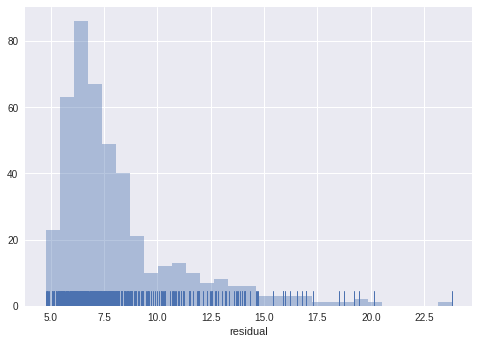

In [9]:
sns.distplot(df['residual'],  kde=False, rug=True)
plt.show()

In [10]:
len(df)

440

In [11]:
plt.close()

In [12]:
residuals = df['residual'].values.tolist()

In [13]:
np.max(residuals) - np.min(residuals)

19.017492294311523

In [14]:
df['residual']

358    23.783335
263    20.135767
259    19.468519
304    19.223610
222    18.764725
375    18.490246
404    17.277061
54     16.947735
207    16.942398
241    16.770901
38     16.555483
51     16.226910
202    15.990052
365    15.902779
116    15.902182
224    15.423716
162    14.709557
290    14.645925
47     14.618254
136    14.335705
8      14.105602
239    14.096577
93     14.056424
173    13.982555
289    13.970140
137    13.891220
107    13.761789
414    13.733879
191    13.663459
214    13.594164
         ...    
379     5.535788
298     5.511476
169     5.465705
199     5.460803
68      5.458718
293     5.451179
27      5.441486
92      5.394897
276     5.386751
144     5.354434
349     5.345767
280     5.336103
329     5.320559
323     5.304674
376     5.253036
220     5.251566
208     5.249150
347     5.163885
112     5.144548
69      5.137314
22      5.134398
362     5.116675
35      5.078004
213     5.074884
282     5.045971
80      4.927567
189     4.892761
193     4.8457

In [15]:
def RadiantDireDifference(row, column):
    faction = ['radiant', 'dire']
    poss = ['pos1', 'pos2', 'pos3', 'pos4', 'pos5']
    radiantSum = 0
    direSum = 0
    for pos in poss:
        radiantSum += row['radiant_'+ pos + '_' + column]
        direSum += row['dire_'+ pos + '_' + column]
    return radiantSum - direSum

def reject_outliers(data, m=1.5):
    return abs(data - np.mean(data)) < m * np.std(data)


def heroKDAdeficit(row):
    faction = ['radiant', 'dire']
    poss = ['pos1', 'pos2', 'pos3', 'pos4', 'pos5']
    largestAbsoluteSoFar = -1
    returnVal = -1
    for pos in poss:
        for fac in faction:
            value = row[fac + '_' + pos + '_kills'] + \
                        row[fac + '_' + pos + '_assists'] - \
                        row[fac + '_' + pos + '_deaths']
            if abs(value) >= largestAbsoluteSoFar:
                largestAbsoluteSoFar = abs(value)
                returnVal = value
    return returnVal

def heroKDdeficit(row):
    faction = ['radiant', 'dire']
    poss = ['pos1', 'pos2', 'pos3', 'pos4', 'pos5']
    largestAbsoluteSoFar = -1
    returnVal = -1
    for pos in poss:
        for fac in faction:
            value = row[fac + '_' + pos + '_kills'] - \
                        row[fac + '_' + pos + '_deaths']
            if abs(value) >= largestAbsoluteSoFar:
                largestAbsoluteSoFar = abs(value)
                returnVal = value
    return returnVal

def heroKD(row):
    faction = ['radiant', 'dire']
    poss = ['pos1', 'pos2', 'pos3', 'pos4', 'pos5']
    largestAbsoluteSoFar = -1
    returnVal = -1
    for pos in poss:
        for fac in faction:
            value = row[fac + '_' + pos + '_kills'] - \
                        row[fac + '_' + pos + '_deaths']
            if abs(value) >= largestAbsoluteSoFar:
                largestAbsoluteSoFar = abs(value)
                returnVal = int(pos[3:4])
    return returnVal


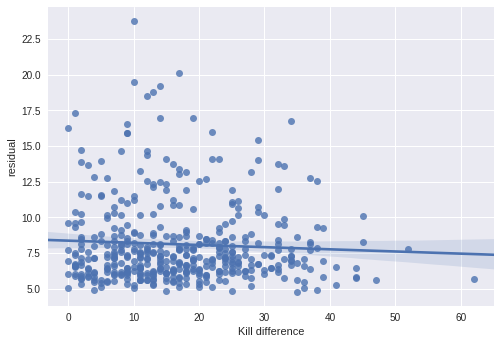

In [16]:
kill_difference = np.abs(df.apply(RadiantDireDifference, args=('kills',), axis=1))
sns.regplot(kill_difference, df['residual'])
ax = plt.gca()
ax.set_xlabel("Kill difference")
plt.show()

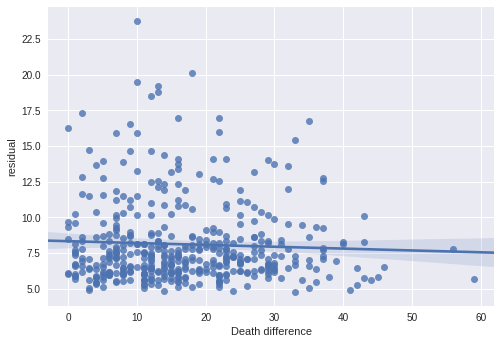

In [17]:
death_difference = df.apply(RadiantDireDifference, args=('deaths',), axis=1)
sns.regplot(np.abs(death_difference), df['residual'])
ax = plt.gca()
ax.set_xlabel("Death difference")
plt.show()

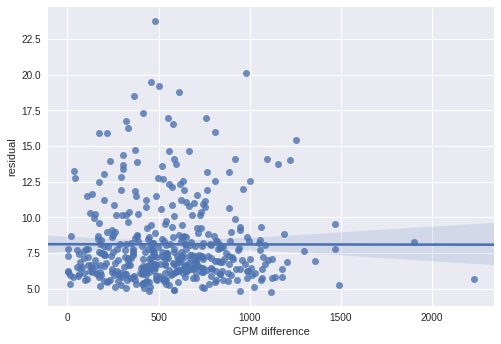

In [18]:
gold_difference = df.apply(RadiantDireDifference, args=('gpm',), axis=1)
above_ = np.abs(gold_difference) <= 5000

indices = np.where(above_)[0]
sns.regplot(np.abs(gold_difference)[above_], df['residual'].iloc[indices])
ax = plt.gca()
ax.set_xlabel("GPM difference")
plt.show()

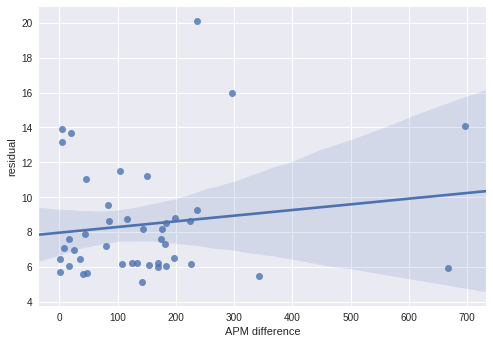

In [19]:
apm_difference = df.apply(RadiantDireDifference, args=('apm',), axis=1)
sns.regplot(np.abs(apm_difference), df['residual'])
ax = plt.gca()
ax.set_xlabel("APM difference")
plt.show()

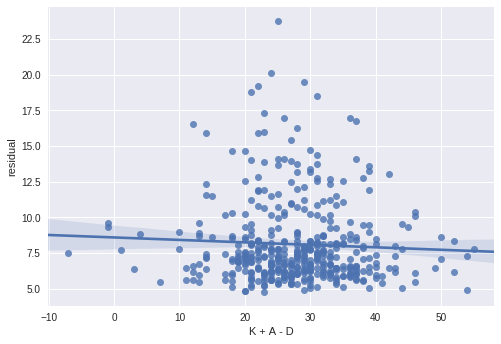

In [20]:
kda = df.apply(heroKDAdeficit, axis=1)
sns.regplot(kda, df['residual'])
ax = plt.gca()
ax.set_xlabel("K + A - D")
plt.show()

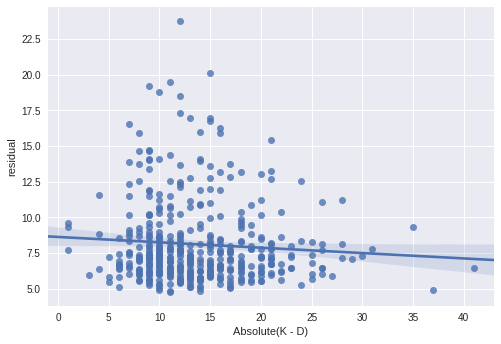

In [21]:
kd = df.apply(heroKDdeficit, axis=1)
sns.regplot(np.abs(kd), df['residual'])
ax = plt.gca()
ax.set_xlabel("Absolute(K - D)")
plt.show()

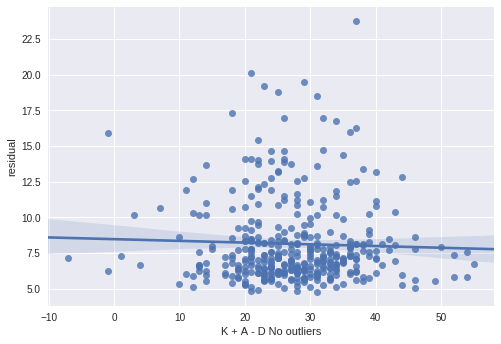

In [22]:
kda = df.apply(heroKDAdeficit, axis=1)
kda_mean = np.mean(kda)
kda_std = np.std(kda)
indices = np.where(np.logical_and(kda <= kda_mean + 1.5*kda_std, kda >= kda_mean-1.5*kda_std))[0]
sns.regplot(kda[indices], df['residual'].iloc[indices])
ax = plt.gca()
ax.set_xlabel("K + A - D No outliers")
plt.show()

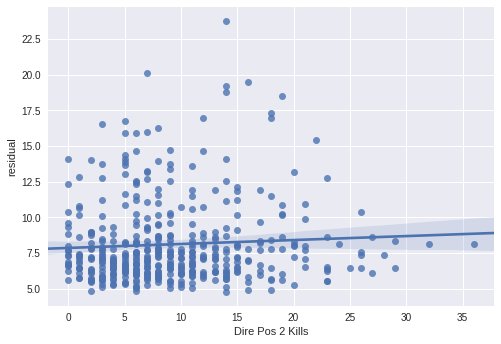

In [23]:
sns.regplot(df['dire_pos2_kills'], df['residual'])
ax = plt.gca()
ax.set_xlabel("Dire Pos 2 Kills")
plt.show()

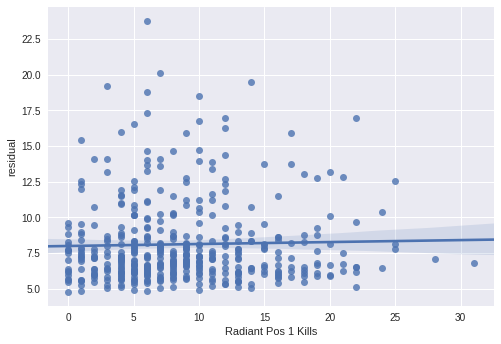

In [24]:
sns.regplot(df['radiant_pos1_kills'], df['residual'])
ax = plt.gca()
ax.set_xlabel("Radiant Pos 1 Kills")
plt.show()

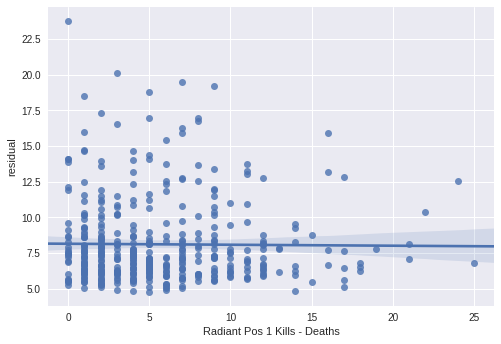

In [25]:
sns.regplot(np.abs(df['radiant_pos1_kills'] - df['radiant_pos1_deaths']), df['residual'])
ax = plt.gca()
ax.set_xlabel("Radiant Pos 1 Kills - Deaths")
plt.show()

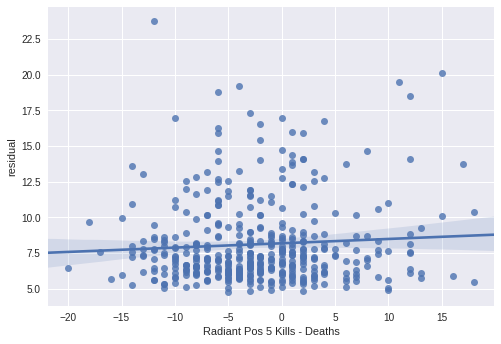

In [26]:
sns.regplot(df['radiant_pos5_kills'] - df['radiant_pos5_deaths'], df['residual'])
ax = plt.gca()
ax.set_xlabel("Radiant Pos 5 Kills - Deaths")
plt.show()

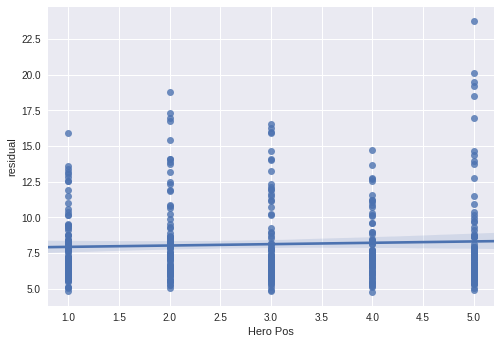

In [27]:
sns.regplot(df.apply(heroKD, axis=1), df['residual'])
ax = plt.gca()
ax.set_xlabel("Hero Pos")
plt.show()

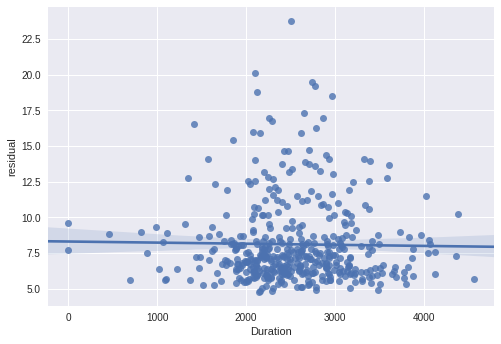

In [32]:
sns.regplot(df['duration'], df['residual'])
ax = plt.gca()
ax.set_xlabel("Duration")
plt.show()

In [28]:
df[df['residual'] > 17]

,match_id,positive_votes,negative_votes,first_blood_time,radiant_win,duration,dire_pos1_ancient_kills,dire_pos1_courier_kills,dire_pos1_kills,dire_pos1_neutral_kills,...,dire_pos2_abandons,dire_pos3_abandons,dire_pos4_abandons,dire_pos5_abandons,radiant_pos1_abandons,radiant_pos2_abandons,radiant_pos3_abandons,radiant_pos4_abandons,radiant_pos5_abandons,residual
358,3215302144,0,0,133,True,2500,NaN,NaN,8,NaN,...,0,0,0,0,0,0,0,0,0,23.783335
263,3215336448,0,0,118,True,2104,30.0,0.0,4,173.0,...,0,0,0,0,0,0,0,0,0,20.135767
259,3215364864,0,0,516,True,2736,NaN,NaN,1,NaN,...,0,0,0,0,0,0,0,0,0,19.468519
304,3215253504,0,0,259,False,2775,NaN,NaN,2,NaN,...,0,0,0,0,0,0,0,1,0,19.223610
222,3215305472,0,0,152,True,2121,NaN,NaN,3,NaN,...,0,1,0,0,0,0,0,0,0,18.764725
375,3215230208,0,0,119,True,2966,NaN,NaN,7,NaN,...,0,0,0,0,0,0,0,0,0,18.490246
404,3215313664,0,0,231,True,2650,NaN,NaN,4,NaN,...,0,0,0,0,0,0,0,0,0,17.277061


In [29]:
df[df['residual'] < 7.5].sample(10, random_state=1)

,match_id,positive_votes,negative_votes,first_blood_time,radiant_win,duration,dire_pos1_ancient_kills,dire_pos1_courier_kills,dire_pos1_kills,dire_pos1_neutral_kills,...,dire_pos2_abandons,dire_pos3_abandons,dire_pos4_abandons,dire_pos5_abandons,radiant_pos1_abandons,radiant_pos2_abandons,radiant_pos3_abandons,radiant_pos4_abandons,radiant_pos5_abandons,residual
127,3215095296,0,0,10,True,2576,NaN,NaN,2,NaN,...,0,0,0,0,0,0,0,0,0,6.769508
44,3215159040,0,0,0,False,2147,NaN,NaN,13,NaN,...,0,0,0,0,0,0,0,0,0,4.765842
294,3215438848,0,0,70,True,2940,NaN,NaN,5,NaN,...,0,0,0,0,0,0,0,1,0,5.615639
27,3215137280,0,0,82,True,2392,NaN,NaN,2,NaN,...,0,0,0,0,0,0,0,0,0,5.441486
40,3215271168,0,0,250,True,2365,NaN,NaN,5,NaN,...,0,0,0,1,0,0,0,0,0,6.599493
68,3215099648,0,0,238,True,1981,NaN,NaN,0,NaN,...,0,0,0,0,0,1,0,0,0,5.458718
438,3215121920,0,0,5,True,2015,NaN,NaN,0,NaN,...,0,0,0,0,0,0,0,0,0,6.901570
361,3215327488,0,0,62,False,2595,NaN,NaN,2,NaN,...,0,0,0,0,0,0,0,0,0,6.248038
376,3215325696,0,0,10,True,2694,NaN,NaN,11,NaN,...,0,0,0,0,0,0,0,0,0,5.253036
344,3215126272,0,0,94,False,2239,NaN,NaN,0,NaN,...,0,0,0,1,0,0,0,0,0,7.415165


In [34]:
biggestAnom = np.loadtxt('data/anomalies.csv', delimiter = ',')
theirOutput = np.loadtxt('data/output.csv', delimiter = ",")

In [41]:
def whichIndex(row1, row2):
    largestError = -1
    index = -1
    for i in range(1, len(row1)):
        if abs(row1[i] - row2[i]) > largestError:
            largestError = abs(row1[i] - row2[i])
            index = i
    return index

for i in range(len(biggestAnom)):
    index = whichIndex(biggestAnom[i, :], theirOutput[i, :])
    df.columns[index]
    print biggestAnom[i, 0], df.columns[index], biggestAnom[i, index], theirOutput[i, index]

3215309056.0 radiant_pos3_ancient_kills 0.995847344398 -0.000755190849304
3215442688.0 dire_pos5_pings 0.69792932272 -0.00183379650116
3215369984.0 dire_pos5_gold_spent 0.98532474041 -0.00287616252899
3215117056.0 radiant_pos2_rune_pickups 0.976650416851 -0.00102615356445
3215475712.0 dire_pos4_ancient_kills 0.989591896534 -0.00103939697146
3215295232.0 dire_pos5_neutral_kills 0.805929481983 -0.000198841094971
3215255040.0 dire_pos4_gold_spent 0.740376114845 0.000161051750183
3215132672.0 dire_pos3_rune_pickups 0.977136254311 0.0010951757431
3215353856.0 radiant_pos2_gold_spent 0.746239602566 -0.000252962112427
3215424768.0 dire_pos1_pings 0.809497892857 -0.000454902648926
